# Cars93:  Dicision Tree Algorithm

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import plotly as pl
from sklearn.tree import DecisionTreeClassifier
from matplotlib import pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn import tree
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LinearRegression
df = pd.read_csv('Cars93.csv')

### 1. Process the data: cleaning, dropping columns, duplicates values, and null values

In [2]:
df = df.drop(columns=['Luggage.room','Rear.seat.room','AirBags','Man.trans.avail','Fuel.tank.capacity'])
df = df.drop(columns=['Length','Width','Turn.circle','Wheelbase','Rev.per.mile','Min.Price','Max.Price','RPM','Cylinders'])
df.isna().sum()
df = df.drop_duplicates()

In [3]:
# Separationg Target variable
X = df.drop('Origin', axis=1)
y = df['Origin']

In [4]:
X.shape

(93, 13)

- get_dummies() to convert categorical variables into dummy/indicator variables

In [5]:
tmp = pd.get_dummies(X['Manufacturer'], drop_first=True)
tmp2 = pd.get_dummies(X['Model'], drop_first=True)
tmp3 = pd.get_dummies(X['Type'], drop_first=True)
tmp4 = pd.get_dummies(X['DriveTrain'], drop_first=True)
tmp5 = pd.get_dummies(X['Make'], drop_first=True)
X = pd.concat([X, tmp, tmp2, tmp3], axis=1)
X = X.drop(columns=['Manufacturer','Model','Type','DriveTrain','Make'], axis=1)

### 2. Train the model, fit, make prediction, and get the score

In [6]:
# Spliting dataset to test nd train
results = train_test_split(X, y, random_state=42, test_size=0.333)
X_train, X_test, y_train, y_test = results
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((62, 136), (31, 136), (62,), (31,))

In [7]:
clf_entropy = DecisionTreeClassifier(criterion = 'entropy',random_state=42 )
clf_entropy.fit(X_train, y_train)

DecisionTreeClassifier(criterion='entropy', random_state=42)

- Function to perfrom training with entrophy (randomness)
- criterion='entropy' is used to specify that the entropy criterion should be used to measure the quality of the splits
- entropy criterion is a measure of the impurity of a node in the decision tree.
- The aim of the algorithm is to minimize this impurity and produce a pure set of samples at the leaf nodes.
- clf_entropy is the trained decision tree model, which can be used to predict the target labels of new data points 
 based on their feature values.


In [8]:
# make prediction
y_pred_en = clf_entropy.predict(X_test)
y_pred_en

array(['non-USA', 'USA', 'non-USA', 'non-USA', 'USA', 'USA', 'USA',
       'non-USA', 'USA', 'non-USA', 'non-USA', 'USA', 'non-USA',
       'non-USA', 'USA', 'USA', 'USA', 'USA', 'non-USA', 'non-USA', 'USA',
       'non-USA', 'non-USA', 'USA', 'USA', 'USA', 'non-USA', 'USA', 'USA',
       'non-USA', 'USA'], dtype=object)

In [9]:
print(f'Train score: {clf_entropy.score(X_train, y_train)} ,Test score: {clf_entropy.score(X_test, y_test)}')
# Check Accuracy
print("Accuracy is", accuracy_score(y_test, y_pred_en)*100)

Train score: 1.0 ,Test score: 0.7741935483870968
Accuracy is 77.41935483870968


### 3. Visualization

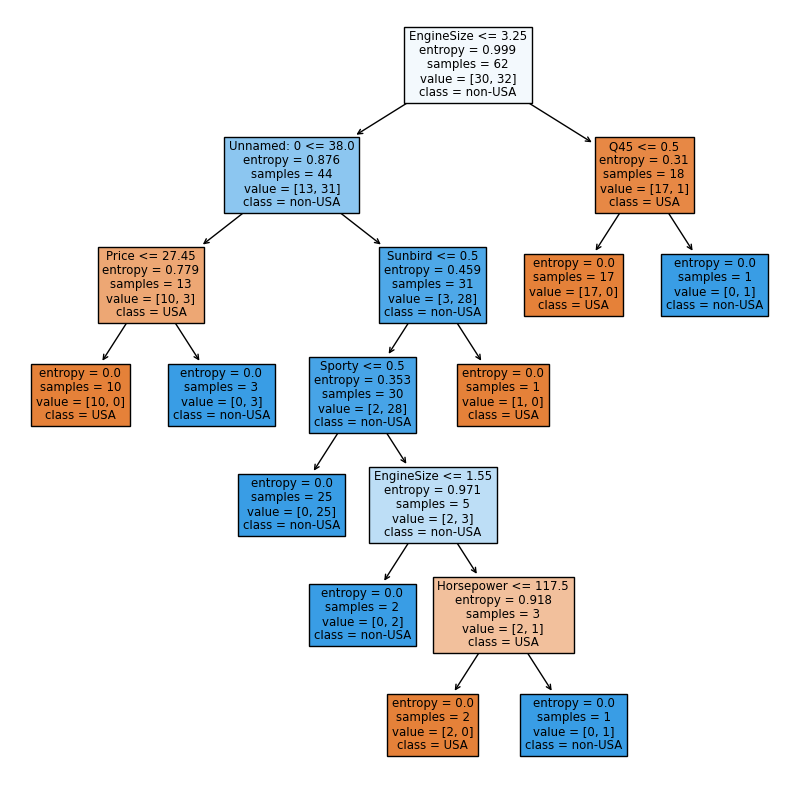

In [10]:
plt.figure(figsize=(10, 10))
tree.plot_tree(clf_entropy, feature_names=X.columns, class_names=clf_entropy.classes_ , filled=True)
plt.show()


###  4. Using multiple features and target variable ( Price)

In [11]:
cols =['Horsepower','EngineSize','Weight','DriveTrain','Type']
X2 = df[cols]
y2 = df['MPG.city']
y2.astype(str)
tmp = pd.get_dummies(X2['Type'], drop_first=True)
tmp2 = pd.get_dummies(X2['DriveTrain'], drop_first=True)
X2 = pd.concat([X2,tmp,tmp2], axis=1)
X2 = X2.drop(columns=['Type','DriveTrain'], axis=1)


In [38]:
X2.describe().T

,count,mean,std,min,25%,50%,75%,max
Horsepower,93.0,143.827957,52.374410,55.0,103.0,140.0,170.0,300.0
EngineSize,93.0,2.667742,1.037363,1.0,1.8,2.4,3.3,5.7
Weight,93.0,3072.903226,589.896510,1695.0,2620.0,3040.0,3525.0,4105.0
Large,93.0,0.118280,0.324689,0.0,0.0,0.0,0.0,1.0
Midsize,93.0,0.236559,0.427273,0.0,0.0,0.0,0.0,1.0
Small,93.0,0.225806,0.420379,0.0,0.0,0.0,0.0,1.0
Sporty,93.0,0.150538,0.359536,0.0,0.0,0.0,0.0,1.0
Van,93.0,0.096774,0.297252,0.0,0.0,0.0,0.0,1.0
Front,93.0,0.720430,0.451220,0.0,0.0,1.0,1.0,1.0
Rear,93.0,0.172043,0.379463,0.0,0.0,0.0,0.0,1.0


In [12]:
result = train_test_split(X2, y2, random_state=42, test_size=0.333)

X2_train, X2_test, y2_train, y2_test = result
X2_train.shape, X2_test.shape, y2_train.shape, y2_test.shape

((62, 10), (31, 10), (62,), (31,))

In [13]:
clf = DecisionTreeClassifier(criterion = 'entropy',random_state=42 )
clf.fit(X2_train, y2_train)
y2.astype(str)

0     25
1     18
2     20
3     19
4     22
      ..
88    17
89    21
90    18
91    21
92    20
Name: MPG.city, Length: 93, dtype: object

- **convert the continuous MPG.city variable into a categorical variable by binning it into two categories.**

In [14]:
y2_train = pd.cut(y2_train, bins=2, labels=['low', 'high'])

In [15]:
y2_pred_en = clf.predict(X2_test)
y2_pred_en

array([17, 29, 17, 39, 28, 21, 23, 17, 17, 28, 29, 17, 17, 17, 22, 20, 20,
       29, 19, 15, 17, 22, 25, 39, 22, 23, 23, 17, 28, 17, 19],
      dtype=int64)

In [16]:
print(f'Train score: {clf.score(X2_train, y2_train)} ,Test score: {clf.score(X2_test, y2_test)}')
# Check Accuracy
print("Accuracy is", accuracy_score(y2_test, y2_pred_en)*100)

Train score: 0.0 ,Test score: 0.12903225806451613
Accuracy is 12.903225806451612


- **Visualization with treeplot**

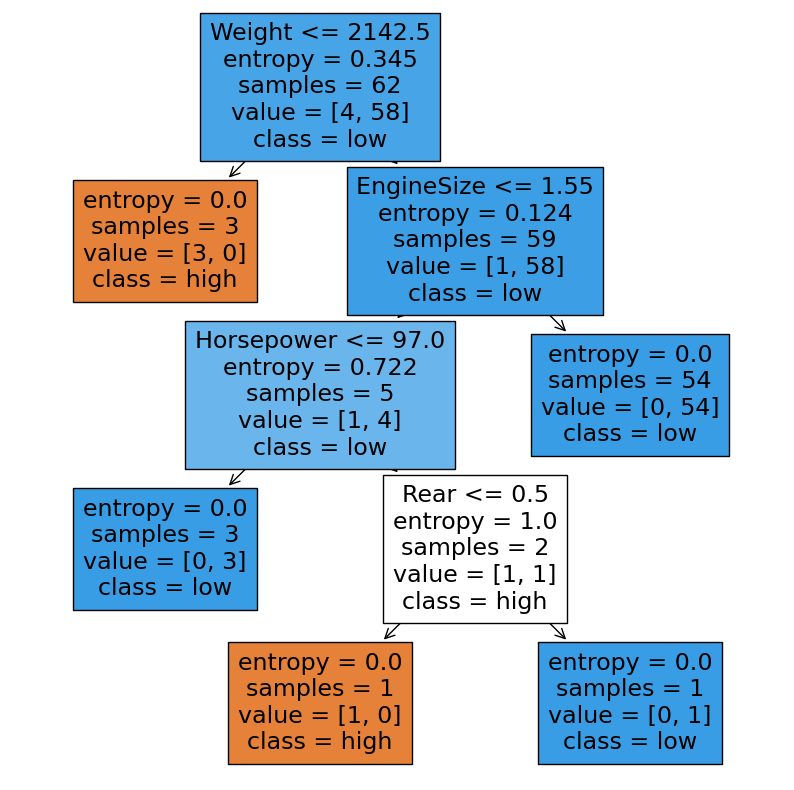

In [17]:
# fit the classifier on the training data
clf.fit(X2_train, y2_train)

# plot the decision tree
plt.figure(figsize=(10, 10))
tree.plot_tree(clf, feature_names=X2.columns, class_names=clf.classes_, filled=True);


### 5. Other features and Taget variables to compare predict vs estimate

- **EngineSize and weight**

In [18]:
X3 =df[['EngineSize']]
y3 = df['Weight']
results = train_test_split(X3, y3, random_state=42, test_size=0.333)
X3_train, X3_test, y3_train, y3_test = results
X3_train.shape, X3_test.shape, y3_train.shape, y3_test.shape

reg = tree.DecisionTreeRegressor()
reg.fit(X3_train, y3_train)

DecisionTreeRegressor()

In [19]:
reg.score(X3_train, y3_train), reg.score(X3_test, y3_test)
print(f'train score: {reg.score(X3_train, y3_train)} ,test score: {reg.score(X3_test, y3_test)}')


train score: 0.8927459206920432 ,test score: 0.77117883032971


In [20]:
y3_predict = reg.predict(X3_test)
df_result = pd.DataFrame({'test_price':y3_test, 'predict_prices':y3_predict})
df_result.head(5)

,test_price,predict_prices
40,2865,2865.00
22,2270,2318.75
55,3735,3486.00
72,2350,2440.00
0,2705,2452.50


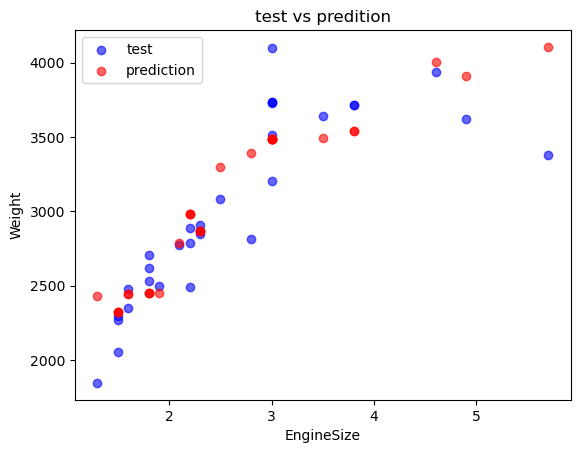

In [21]:
plt.scatter(X3_test, y3_test, color = 'blue', marker='o', alpha=0.6)
plt.scatter(X3_test, y3_predict, color = 'red', marker='o', alpha=0.6)
plt.title('test vs predition')
plt.xlabel('EngineSize')
plt.ylabel('Weight')
plt.legend(['test', 'prediction'])
plt.show()

- **Horsepower and Price**

In [22]:
X4 =df[['Horsepower']]
y4 = df['Price']
results = train_test_split(X4, y4, random_state=42, test_size=0.333)
X4_train, X4_test, y4_train, y4_test = results
X4_train.shape, X4_test.shape, y4_train.shape, y4_test.shape

reg = tree.DecisionTreeRegressor()
reg.fit(X4_train, y4_train)
reg.score(X4_train, y4_train), reg.score(X4_test, y4_test)

(0.9059471480532773, 0.3732951205923246)

In [23]:
print(f'Train score: {reg.score(X4_train, y4_train)} ,Test score: {reg.score(X4_test, y4_test)}')

Train score: 0.9059471480532773 ,Test score: 0.3732951205923246


In [24]:
y4_predict = reg.predict(X4_test)
df_result = pd.DataFrame({'test_price':y4_test, 'predict_prices':y4_predict})
df_result.head(5)

,test_price,predict_prices
40,19.8,22.366667
22,9.2,11.566667
55,19.1,18.400000
72,9.0,8.400000
0,15.9,17.533333


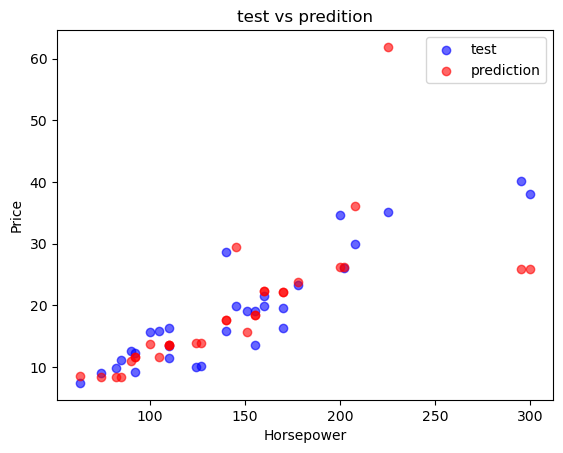

In [25]:
plt.scatter(X4_test, y4_test, color = 'blue', marker='o', alpha=0.6)
plt.scatter(X4_test, y4_predict, color = 'red', marker='o', alpha=0.6)
plt.title('test vs predition')
plt.xlabel('Horsepower')
plt.ylabel('Price')
plt.legend(['test', 'prediction'])
plt.show()

In [26]:
import pandas as pd
from matplotlib import pyplot as plt
import numpy as np
from sklearn.neighbors import KNeighborsRegressor
import seaborn as sn
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeClassifier

In [27]:
y = df['MPG.city']
X = df[['Price']]
model = LinearRegression()
model.fit(X, y)
model.score(X, y)

0.35350416604574997

In [28]:
X3 =df[['MPG.city']]
y3 = df['Price']

In [29]:
y = df['MPG.city']
X = df[['Price']]
model = KNeighborsRegressor()
model.fit(X, y)
model.score(X, y)

0.7334085812196078

In [30]:
y = df['MPG.city']
X = df[['Price']]
model = tree.DecisionTreeRegressor()
model.fit(X, y)
model.score(X, y)

0.9453922388589954